<a href="https://colab.research.google.com/github/ab320043/Ahussein-MyRepo/blob/main/5_ImageWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
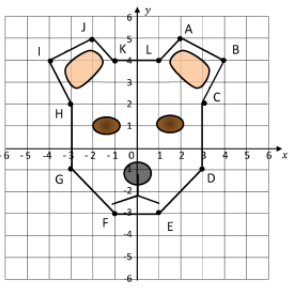
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br>
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



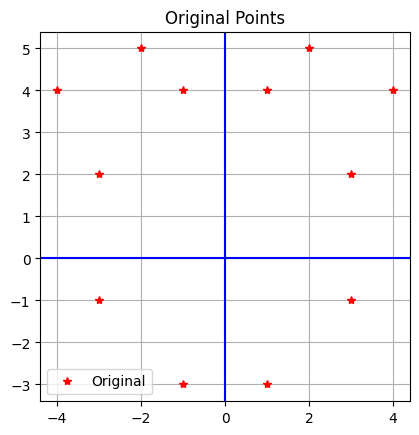

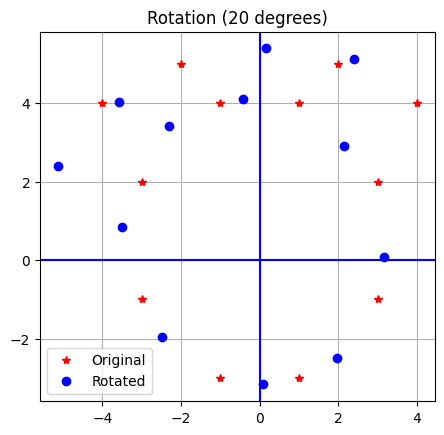

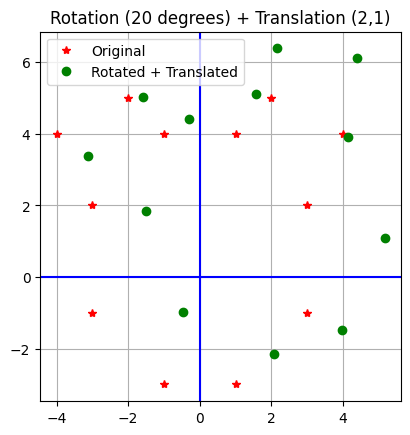

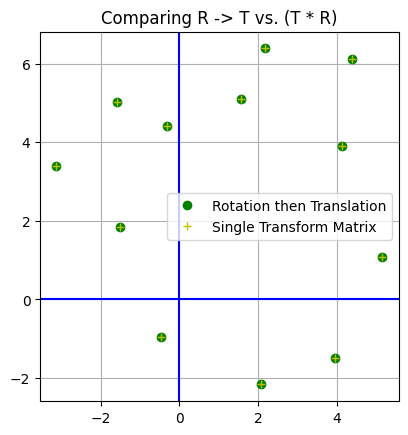

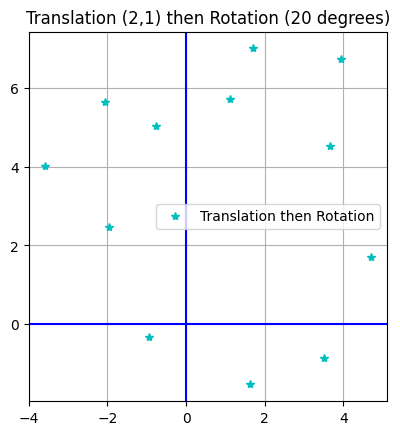

Are RT and TR equal?: False
RT Matrix:
 [[ 0.93969262 -0.34202014  2.        ]
 [ 0.34202014  0.93969262  1.        ]
 [ 0.          0.          1.        ]]
TR Matrix:
 [[ 0.93969262 -0.34202014  1.5373651 ]
 [ 0.34202014  0.93969262  1.62373291]
 [ 0.          0.          1.        ]]


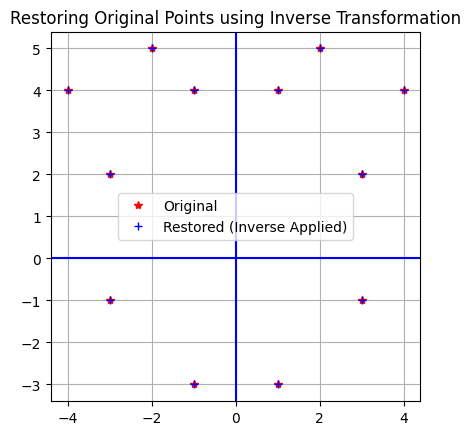

Do the restored points match the original?: True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given rotation angle and translation values
tetadeg = 20  # Rotation angle in degrees
teta = np.radians(tetadeg)  # Convert to radians
tx, ty = 2, 1  # Translation values

# Define points in homogeneous coordinates (each column represents a point)
points = np.array([[2, 4, 3, 3, 1, -1, -3, -3, -4, -2, -1, 1],
                   [5, 4, 2, -1, -3, -3, -1, 2, 4, 5, 4, 4],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])  # Homogeneous coordinate

# (a) Rotation Matrix (20 degrees)
R = np.array([[np.cos(teta), -np.sin(teta), 0],
              [np.sin(teta), np.cos(teta), 0],
              [0, 0, 1]])

# (b) Translation Matrix
T = np.array([[1, 0, tx],
              [0, 1, ty],
              [0, 0, 1]])

# (c) Plot original points
fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(points[0, :], points[1, :], 'r*', label="Original")
ax.legend()
plt.title("Original Points")
plt.show()

# (d) Apply Rotation
rotated_points = np.matmul(R, points)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(points[0, :], points[1, :], 'r*', label="Original")
ax.plot(rotated_points[0, :], rotated_points[1, :], 'bo', label="Rotated")
ax.legend()
plt.title("Rotation (20 degrees)")
plt.show()

# (e) Apply Translation after Rotation
trans_rot_points = np.matmul(T, rotated_points)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(points[0, :], points[1, :], 'r*', label="Original")
ax.plot(trans_rot_points[0, :], trans_rot_points[1, :], 'go', label="Rotated + Translated")
ax.legend()
plt.title("Rotation (20 degrees) + Translation (2,1)")
plt.show()

# (f) Compute a single transformation matrix for rotation then translation
RT = np.matmul(T, R)
trans_rot_points2 = np.matmul(RT, points)  # Apply combined transformation

fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(trans_rot_points[0, :], trans_rot_points[1, :], 'go', label="Rotation then Translation")
ax.plot(trans_rot_points2[0, :], trans_rot_points2[1, :], 'y+', label="Single Transform Matrix")
ax.legend()
plt.title("Comparing R -> T vs. (T * R)")
plt.show()

# (g) Compute a transformation matrix for translation then rotation
TR = np.matmul(R, T)  # First translate, then rotate
trans_rot_points3 = np.matmul(TR, points)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(trans_rot_points3[0, :], trans_rot_points3[1, :], 'c*', label="Translation then Rotation")
ax.legend()
plt.title("Translation (2,1) then Rotation (20 degrees)")
plt.show()

# (h) Compare matrices RT and TR
are_matrices_equal = np.allclose(RT, TR)
print("Are RT and TR equal?:", are_matrices_equal)
print("RT Matrix:\n", RT)
print("TR Matrix:\n", TR)

# (i) Compute inverse of TR and apply to transformed points
TR_inv = np.linalg.inv(TR)
original_restored_points = np.matmul(TR_inv, trans_rot_points3)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(points[0, :], points[1, :], 'r*', label="Original")
ax.plot(original_restored_points[0, :], original_restored_points[1, :], 'b+', label="Restored (Inverse Applied)")
ax.legend()
plt.title("Restoring Original Points using Inverse Transformation")
plt.show()

# Verify if restored points match original
matches_original = np.allclose(points, original_restored_points)
print("Do the restored points match the original?:", matches_original)



2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
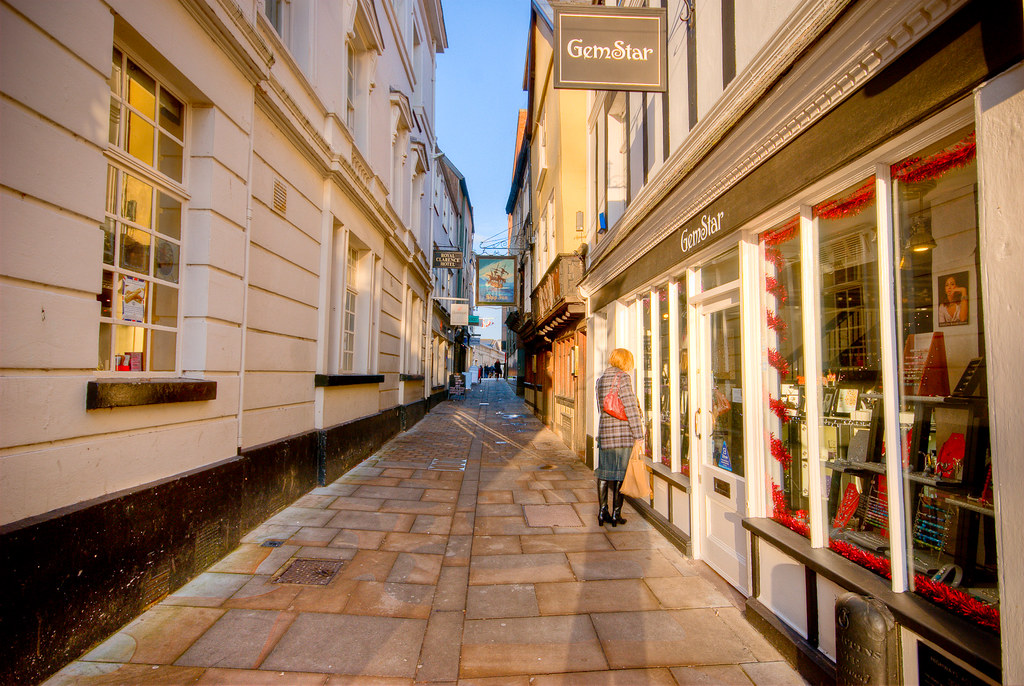
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br>
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



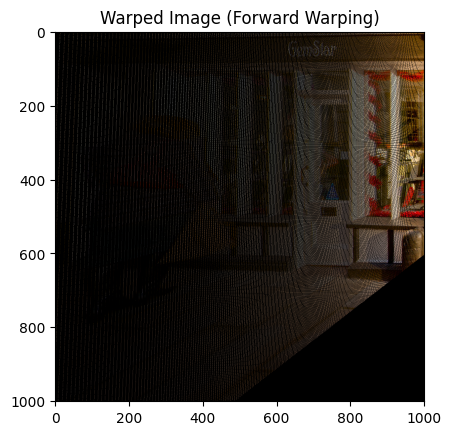

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e61c002c6a17>", line None, in <cell line: 0>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image from URL
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)

# Define Homography matrix
H = np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
              [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
              [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]])

# Define the image grid
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)  # y values
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)  # x values
yv, xv = np.meshgrid(i, j)

# Flatten the grid to column vectors
numpoints = xv.ravel().shape[0]
x_cord = xv.ravel().reshape((1, numpoints))
y_cord = yv.ravel().reshape((1, numpoints))

# Define homogeneous coordinates for transformation
grid = np.vstack((x_cord, y_cord, np.ones((1, numpoints))))

# Apply the Homography Transformation
newgrid = np.matmul(H, grid)

# Convert homogeneous to cartesian coordinates
newgridHetero = newgrid[:2, :] / newgrid[2, :]

# Define the new empty canvas with invalid pixels (-1)
warped = -np.ones((1001, 1001, 3), dtype=np.int16)

# Round transformed coordinates to nearest integer
newgrid2 = np.round(newgridHetero).astype(np.int64)

# Extract color channels
r = img[yv.ravel(), xv.ravel(), 0]
g = img[yv.ravel(), xv.ravel(), 1]
b = img[yv.ravel(), xv.ravel(), 2]

# Validate coordinates within bounds [0,1000]
validsX = np.bitwise_and(newgrid2[0, :] >= 0, newgrid2[0, :] < 1000)
validsY = np.bitwise_and(newgrid2[1, :] >= 0, newgrid2[1, :] < 1000)
valids = np.bitwise_and(validsX, validsY)

# Assign color to valid points
warped[newgrid2[1, valids], newgrid2[0, valids], 0] = r[valids]
warped[newgrid2[1, valids], newgrid2[0, valids], 1] = g[valids]
warped[newgrid2[1, valids], newgrid2[0, valids], 2] = b[valids]

# (b) Visualize Warped Image
plt.imshow(warped)
plt.title("Warped Image (Forward Warping)")
plt.show()

# (c): The warped image has visible gaps due to missing mapped pixels.

# (d): The warped image outside the [0-1000] range is missing data, appearing as black (invalid) areas.

# (e) Nearest Neighbor Interpolation
warped2 = np.zeros((1001, 1001, 3), dtype=np.uint8)
area2check = 5  # Search radius

# Loop through the valid area of the warped image
for i in range(area2check, warped.shape[0] - area2check):
    for j in range(area2check, warped.shape[1] - area2check):
        if warped[i, j, 0] == -1:  # Missing pixel
            distance = area2check * area2check + 1
            for k in range(i - area2check, i + area2check):
                for l in range(j - area2check, j + area2check):
                    distancetested = abs(k - i) + abs(l - j)
                    if warped[k, l, 0] >= 0 and distancetested < distance:
                        distance = distancetested
                        warped2[i, j] = warped[k, l]
        else:
            warped2[i, j] = warped[i, j]

# (f) Visualize Interpolated Image
plt.imshow(warped2)
plt.title("Warped Image after Nearest Neighbor Interpolation")
plt.show()

# (g): The interpolated image appears smoother with fewer gaps than the initially warped image.



3. Write a function of the form (10%):



>> imwarped = warpImage(im,H,limit_coordinates)



where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


In [ ]:
def  warpImage(im,H,limit_coordinates):
    xmin, xmax, ymin, ymax = limit_coordinates
    width = xmax - xmin
    height = ymax - ymin
    imwarped = np.zeros((height, width, 3), dtype=np.uint8)
    x_target, y_target = np.meshgrid(np.arange(xmin, xmax), np.arange(ymin, ymax))

    num_pixels = x_target.size
    target_grid = np.vstack((x_target.ravel(), y_target.ravel(), np.ones(num_pixels)))

    H_inv = np.linalg.inv(H)
    source_grid = np.matmul(H_inv, target_grid)

    source_x = (source_grid[0, :] / source_grid[2, :]).astype(int)
    source_y = (source_grid[1, :] / source_grid[2, :]).astype(int)

    valid_mask = (source_x >= 0) & (source_x < im.shape[1]) & (source_y >= 0) & (source_y < im.shape[0])

    imwarped[y_target.ravel()[valid_mask] - ymin, x_target.ravel()[valid_mask] - xmin] = im[source_y[valid_mask], source_x[valid_mask]]

    return imwarped


<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

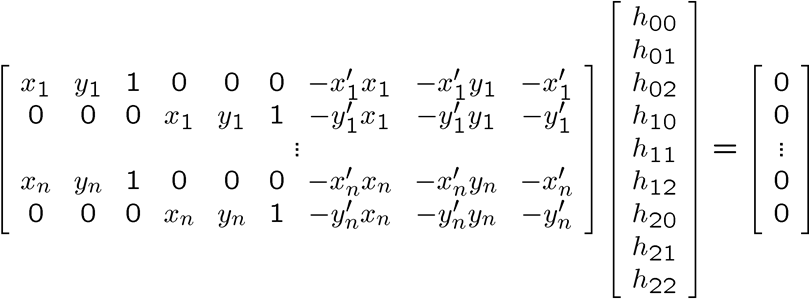
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>
5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>






6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**:
Write a function of the form:


>> imwarped = warpImage(im1,im2,H)



where im1 and im2 are the input images to be warped and H is the homography that wrap im1 to im2.  

Use the method described in class. you need forward and inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”).

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.

